In [5]:
# Created: 20250104

In [6]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [7]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:

# Step 2: Calculate Trix
def calculate_trix(data, period=15):
    # Calculate EMA1, EMA2, EMA3
    ema1 = data['Close'].ewm(span=period, adjust=False).mean()
    ema2 = ema1.ewm(span=period, adjust=False).mean()
    ema3 = ema2.ewm(span=period, adjust=False).mean()
    
    # Calculate Trix
    data['Trix'] = ((ema3 - ema3.shift(1)) / ema3.shift(1)) * 100
    return data

In [10]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply Trix calculation
    period = 15  # Adjust the period as needed
    data = calculate_trix(data, period)
    
    # Step 3: Plot Close Price and Trix
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot Trix
    plt.subplot(2, 1, 2)
    plt.plot(data['Trix'], label=f'Trix ({period})', color='red', linewidth=2)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f'Trix Indicator for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Trix (%)')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


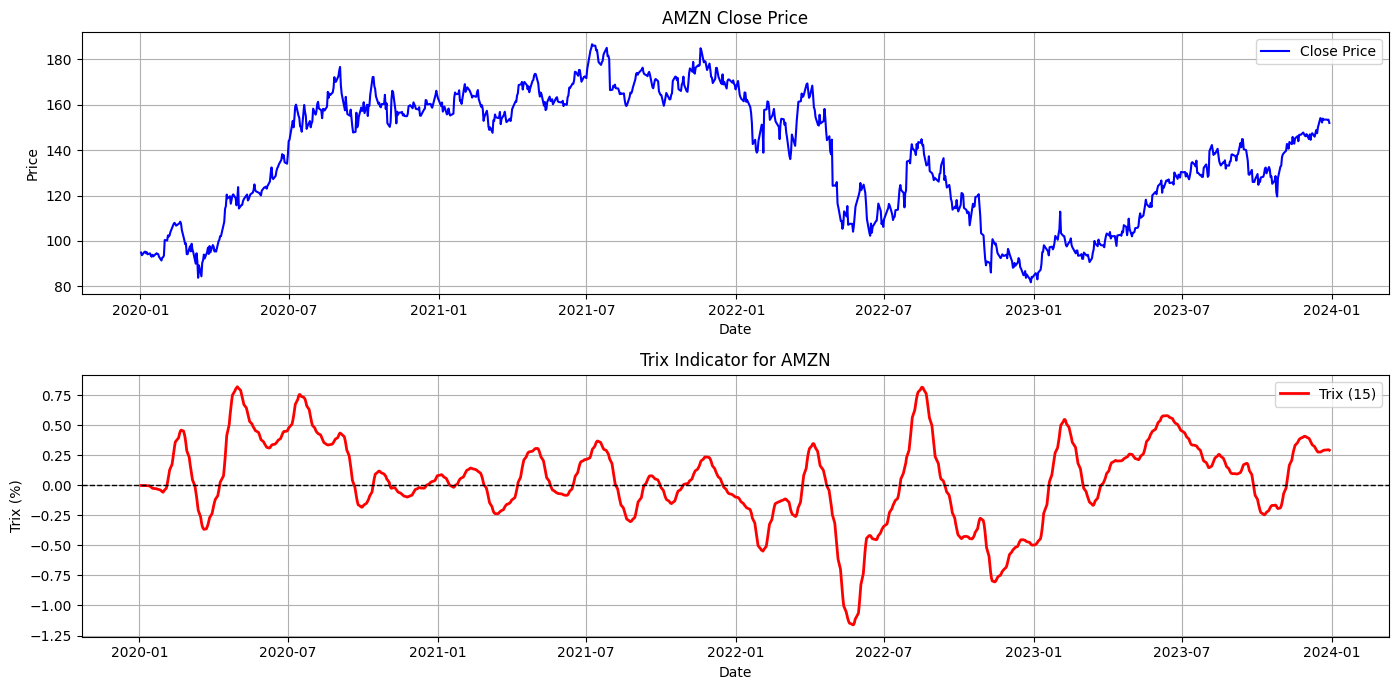

In [11]:
show_graph("AMZN")